In [4]:
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

new_model = tf.keras.models.load_model('EMOTHAW/model(potential Final)')
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 50, 1, 260, 15)    0         
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 50, 1, 260, 30)    16320     
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 1, 260, 15)        8160      
                                                                 
 flatten (Flatten)           (None, 3900)              0         
                                                                 
 dense (Dense)               (None, 200)               780200    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5

In [5]:

#Reads CSV file based on given filename
def read_File(filename):
  file = pd.read_csv(filename[0],sep=' ',skiprows=1,header=None)
  file_loaded = file.iloc[:,[0,1,6]]
  return file_loaded

#Reads all the CSV files inside a folder
def validate_Features(folderName):
  feature_List = []
  for ii in [1,2,4,5,6]:
    directory = folderName + '*' + str(ii) + '.txt'
    feature = read_File(glob.glob(directory))
    #print(feature)
    
    scaler = MinMaxScaler(feature_range=(0.00001,1))
    scaled_feature = scaler.fit_transform(feature)
    feature_List.append(scaled_feature)
  return feature_List

def validate_Folders(foldername, file_count, file_start=[1,1]):
  feature_List = []
  for ii in range(0,len(foldername)):
    file_Directory = 'EMOTHAW/'+ foldername[ii]
    for iii in range(file_start[ii],file_count[ii]): 
      if(iii < 10):
        filename = file_Directory + '/user0' + str(iii) + '/'
      else:
        filename = file_Directory + '/user' + str(iii) + '/'
      #print(filename)
      feature_List.append(validate_Features(filename))
  folder_num = 0
  for amount in range(len(file_count)):
    folder_num += file_count[amount] - file_start[amount]
  for ii in range(folder_num):   
    feature_List[ii] = keras.preprocessing.sequence.pad_sequences(feature_List[ii], padding='post', dtype='float32',maxlen=13000)
    feature_List[ii] = np.hstack(feature_List[ii])  
    feature_List[ii] = tf.squeeze(feature_List[ii]) 
  return (feature_List)
        
test = validate_Folders(['Collection4'],[31],[1])
test = tf.reshape(test,[30,50,1,260,15])

validate = new_model.predict(test)
visualize_Categorical = []
visualize_Binary = []

for score in validate:
    score += 2.5
    score = np.round(score)
    if(score < 10):
        visualize_Categorical.append(0)
        visualize_Binary.append(0)
        print('Normal')
    elif(score < 14):
        visualize_Categorical.append(1)
        visualize_Binary.append(1)
        print('Mild')
    else:
        visualize_Categorical.append(2)
        visualize_Binary.append(1)
        print('Severe')


1/1 [==============================] - 1s 1s/step
Mild
Normal
Mild
Normal
Normal
Normal
Normal
Mild
Normal
Mild
Mild
Mild
Normal
Mild
Normal
Mild
Mild
Mild
Mild
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Mild
Mild
Normal


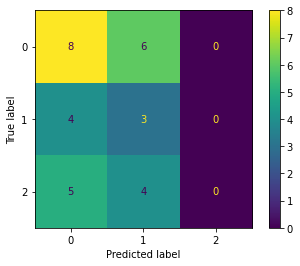

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Y_true = [0,0,1,0,2,1,0,1,0,2,2,0,0,1,0,0,2,0,0,0,2,1,2,1,1,2,0,0,2,2]

#Confusion Matrix for Test data Categorical 
ConfusionMatrixDisplay.from_predictions(Y_true, visualize_Categorical)
plt.show()

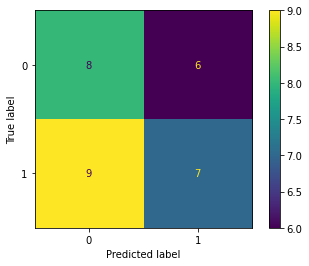

In [9]:
Y_true = [0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1]
ConfusionMatrixDisplay.from_predictions(Y_true, visualize_Binary)
plt.show()

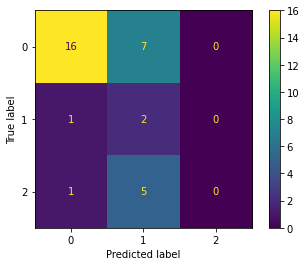

In [6]:
Y_pred = [0,1,0,1,0,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0]
Y_true = [0,0,0,0,1,0,0,0,0,0,0,0,2,0,2,0,0,2,0,0,0,0,0,0,0,2,1,1,2,2,0,0]

ConfusionMatrixDisplay.from_predictions(Y_true, Y_pred)
plt.show()

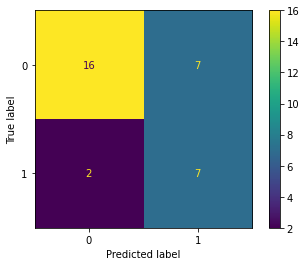

In [10]:
Y_pred = [0,1,0,1,0,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0]
Y_true = [0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0]
ConfusionMatrixDisplay.from_predictions(Y_true, Y_pred)
plt.show()